<a href="https://colab.research.google.com/github/KenObata/Music4All_personal_project/blob/main/music4all_eng_pt_es_no_pop_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week4: The goal of this notebook is to apply TF-IDF, statistical machine learning approach to the Music4All datasets. This study focuses on English, Portuguese, Spanish (Top3) and top 10 genres, except pop to balance data volumes of each genre.


In [1]:
#Check RAM size. If small, you can upgrade.
#you can enable a high-RAM runtime via Runtime > Change runtime type in the menu
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 2.7 MB/s 


In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from collections import Counter

from skmultilearn.model_selection import IterativeStratification   
from sklearn.model_selection import StratifiedKFold
from scipy.sparse import csr_matrix
plt.style.use('seaborn')

CSV_FOLDER = 'drive/MyDrive/music4all/'
LANG_DIR = 'drive/MyDrive/music4all/split-language_only-artist_grouped'
SPLIT_DIR = 'drive/MyDrive/music4all/split-all_labels'
FIG_DIR = 'drive/MyDrive/music4all/figures'

font = {'size': 22}

matplotlib.rc('font', **font)

scikit-multilearn has to be installed from pip
https://github.com/scikit-multilearn/scikit-multilearn/issues/142

In [ ]:
def write_txt(path, list_of_str):
    with open(path, 'w') as f:
        for value in list_of_str:
            f.write(value)
            f.write('\n')

In [4]:
def analyze_genre_tag_df(df, top_n=100):
    """plot the occurrences of top_n items in the given df"""
    def get_counter(items: list):
        """items: list of list"""    
        items = [g.split(',') for g in items]
        items = [item for sublist in items for item in sublist]
        items = Counter(items)    
        return items
    
    def plot_freqs(counter: Counter, top_n, title=''):
        most_common = counter.most_common(top_n)
        names, counts = list(zip(*most_common))

        xs = np.arange(len(names))
        plt.figure(figsize=(18, 7))
        plt.bar(xs, counts)
        plt.xticks(xs + 0.2, names, rotation=60, size=17, ha='right') 
        plt.title('Top-%d %s (out of %d in total)' % (top_n, title, len(counter)), size=20)
        plt.ylabel('occurrence', size=17)
        
    column_name = df.columns[1]
    labels = df[column_name].tolist()
    labels = get_counter(labels)
    
    print('Number of %s: %d' % (column_name, len(labels)))

    plot_freqs(labels, top_n=top_n, title=column_name)
    return labels
    
def analyze_genre_tag_csv(csv_path, top_n):
    """wrapper of analyze_genre_tag_df"""
    basename = os.path.basename(csv_path)
    df = pd.read_csv(os.path.join(CSV_FOLDER, csv_path), header=0, sep='	')
    df.head()
    return analyze_genre_tag_df(df, top_n=top_n)

# Find top20 genre

id_genres.csv

Number of genres: 853


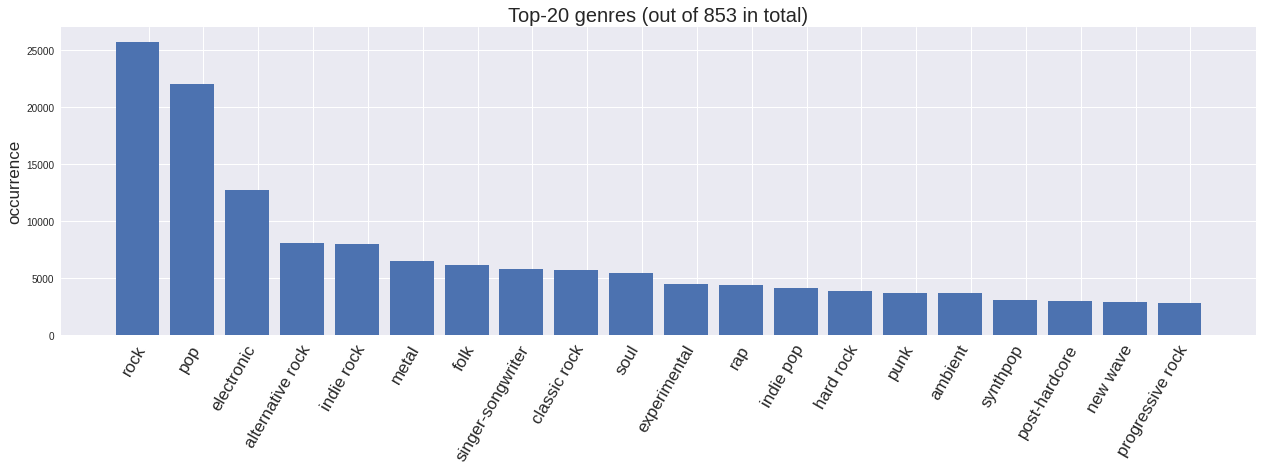

In [5]:
_ = analyze_genre_tag_csv('id_genres.csv', top_n=20)
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'occurrence-genre.png'))

### Remove pop from top_20

In [6]:
#create List of top20 genre
top20_genre=["rock", "electronic","alternative rock","indie rock", 
              "metal","folk","singer-songwriter","classic rock","soul"
              ,"experimental","rap","indie pop","hard rock","punk"
              ,"ambient","synthpop","post-hardcore","new wave","progressive rock"] #pop

#filter genre dataset as top20 genre only.
df_genres = pd.read_csv(os.path.join(CSV_FOLDER, 'id_genres.csv'), header=0, sep='	')
df_genre_top20 = df_genres[df_genres['genres'].isin(top20_genre)]
df_genre_top20

,id,genres
11,00P2bHdWFkghmDqz,soul
27,015mOiDcGVtkg1jP,electronic
30,01EKNot8qVgZpKM7,rock
43,01gyRHLquwXDlhkO,rap
49,01zNMO11qGa7tLqa,rap
...,...,...
109213,zxt2VX0vHKKbgbiz,rap
109249,zzT504Z94j1IAuc3,indie rock
109254,zziALZG1JQ2uUjcy,metal
109262,zzx8CWdM7qkxKQpC,indie rock


Number of genres: 19


Counter({'alternative rock': 384,
         'ambient': 330,
         'classic rock': 185,
         'electronic': 1305,
         'experimental': 257,
         'folk': 1017,
         'hard rock': 203,
         'indie pop': 714,
         'indie rock': 1182,
         'metal': 175,
         'new wave': 169,
         'post-hardcore': 267,
         'progressive rock': 234,
         'punk': 402,
         'rap': 1431,
         'rock': 1887,
         'singer-songwriter': 794,
         'soul': 1337,
         'synthpop': 238})

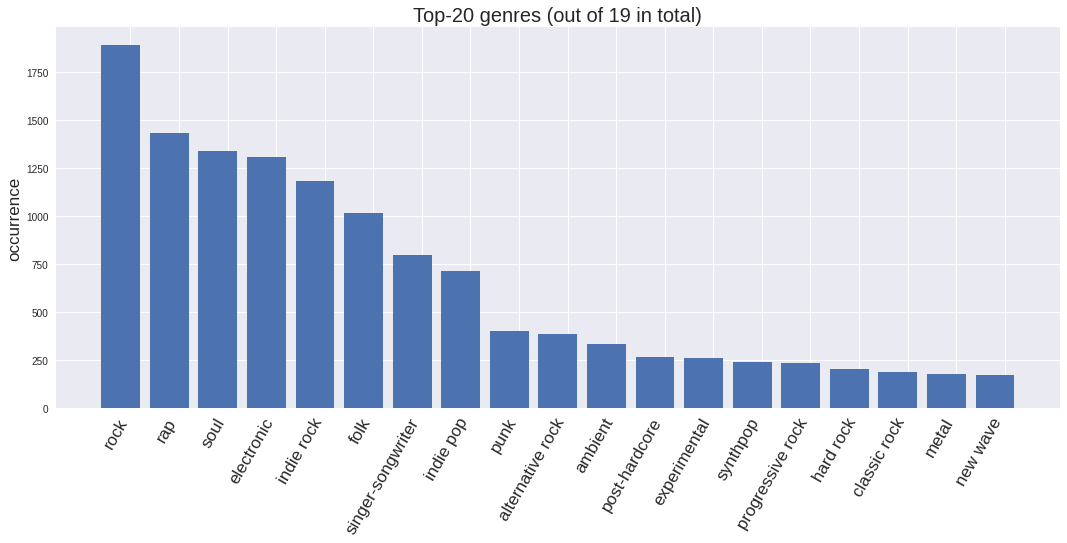

In [7]:
analyze_genre_tag_df(df_genre_top20,20)

Notice that rank20 has only 169 data. So depending on the result we might need to narrow down to top10 genre?

# find top10 language

Number of lang: 46
Counter({'en': 84103, 'INTRUMENTAL': 9417, 'pt': 7020, 'es': 3225, 'ko': 1145, 'fr': 994, 'ja': 615, 'de': 577, 'pl': 446, 'it': 437, 'sv': 231, 'ru': 187, 'id': 140, 'tr': 125, 'fi': 105, 'no': 99, 'nl': 59, 'tl': 42, 'hr': 41, 'hu': 27, 'sw': 21, 'uk': 20, 'el': 18, 'ca': 18, 'ro': 18, 'da': 17, 'ar': 17, 'et': 16, 'so': 16, 'vi': 13, 'af': 8, 'lt': 7, 'cy': 7, 'sl': 7, 'fa': 6, 'sq': 5, 'th': 4, 'zh-cn': 4, 'pa': 2, 'lv': 2, 'bn': 2, 'cs': 2, 'hi': 1, 'sk': 1, 'bg': 1, 'he': 1})


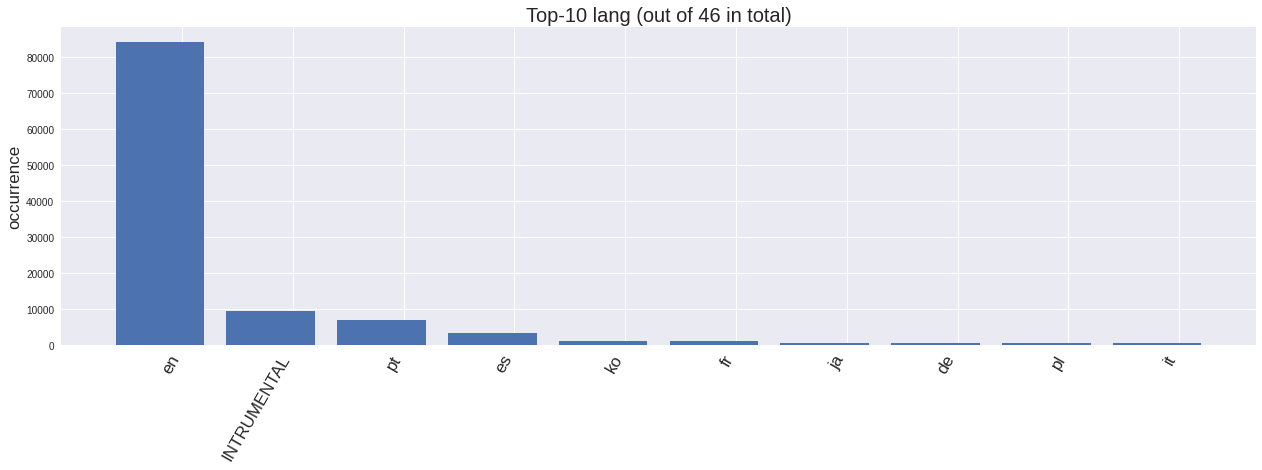

In [8]:
labels_counter = analyze_genre_tag_csv('id_lang.csv', top_n=10)
print(labels_counter)
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'occurrence-language.png'))

In [9]:
# create List of top10 language
#top_10_lang = ['en', 'INTRUMENTAL', 'pt', 'es', 'ko', 'fr', 'ja', 'de', 'pl', 'it']
top_10_lang = ['en', 'pt', 'es']

# Filter dataset as English, Portuguese, Spanish
 Note that this split have overlapping artist in both sets. See artist-grouped-stratified-split for an improved version.

In [10]:
df_lang = pd.read_csv(os.path.join(CSV_FOLDER, 'id_lang.csv'), header=0, sep='	')
df_lang_top10=df_lang[ df_lang['lang'].isin(top_10_lang) ]
df_lang_top10

,id,lang
0,0009fFIM1eYThaPg,en
1,0010xmHR6UICBOYT,en
2,002Jyd0vN4HyCpqL,en
3,006TYKNjNxWjfKjy,en
4,007LIJOPQ4Sb98qV,en
...,...,...
109264,zzyyPUs7hC9Nz2e1,en
109265,zzz0n04uuTUA7fNh,en
109266,zzzj3LYaZtYtbzSr,en
109267,zzznMjZAKnJJXQSj,en


### Now, combine split by language and genre, so we classify each genre by language.

In [11]:
# merge three dataframes into one
df_genre_by_lang = pd.concat([df_genre_top20['id'], df_genre_top20['genres'], df_lang_top10['lang']]
                             , join='inner' ,axis=1)

#Do inner join
df_genre_by_lang


,id,genres,lang
11,00P2bHdWFkghmDqz,soul,en
30,01EKNot8qVgZpKM7,rock,en
43,01gyRHLquwXDlhkO,rap,en
49,01zNMO11qGa7tLqa,rap,pt
58,02H3FqI0CSBlYFo7,rock,en
...,...,...,...
109213,zxt2VX0vHKKbgbiz,rap,en
109249,zzT504Z94j1IAuc3,indie rock,en
109254,zziALZG1JQ2uUjcy,metal,en
109262,zzx8CWdM7qkxKQpC,indie rock,en


# Split by every labels (tags, genres, language) -- multi-labeled
# I recommend to use this split by default for any task on Music4All

In [12]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from skmultilearn.model_selection import iterative_train_test_split

## 5/2: Tags and genres sometimes overall, so added prefix then in the following code we merge all labels(=features).

In [13]:
#create df_all, which is putting lang and genre in a same column
# to run multi-label stratification.
df_genre_by_lang['all_labels'] = df_genre_by_lang[['genres', 'lang']].apply(lambda x: ','.join(x), axis=1)
df_genre_by_lang=df_genre_by_lang.drop(columns=['genres', 'lang'], axis=1)
df_genre_by_lang

,id,all_labels
11,00P2bHdWFkghmDqz,"soul,en"
30,01EKNot8qVgZpKM7,"rock,en"
43,01gyRHLquwXDlhkO,"rap,en"
49,01zNMO11qGa7tLqa,"rap,pt"
58,02H3FqI0CSBlYFo7,"rock,en"
...,...,...
109213,zxt2VX0vHKKbgbiz,"rap,en"
109249,zzT504Z94j1IAuc3,"indie rock,en"
109254,zziALZG1JQ2uUjcy,"metal,en"
109262,zzx8CWdM7qkxKQpC,"indie rock,en"


### Important Note: after filtering/sorting or any data manipulation on datasets, we need to reindex data frame. Otherwise, multi-label stratification fails due to shape mismatch of X and y.

In [14]:
df_genre_by_lang = df_genre_by_lang.reset_index(drop=True)
df_genre_by_lang

,id,all_labels
0,00P2bHdWFkghmDqz,"soul,en"
1,01EKNot8qVgZpKM7,"rock,en"
2,01gyRHLquwXDlhkO,"rap,en"
3,01zNMO11qGa7tLqa,"rap,pt"
4,02H3FqI0CSBlYFo7,"rock,en"
...,...,...
11041,zxt2VX0vHKKbgbiz,"rap,en"
11042,zzT504Z94j1IAuc3,"indie rock,en"
11043,zziALZG1JQ2uUjcy,"metal,en"
11044,zzx8CWdM7qkxKQpC,"indie rock,en"


In [15]:
#check unique set of genre by lang
set(df_genre_by_lang['all_labels'])

{'alternative rock,en',
 'alternative rock,es',
 'alternative rock,pt',
 'ambient,en',
 'classic rock,en',
 'classic rock,es',
 'classic rock,pt',
 'electronic,en',
 'electronic,es',
 'electronic,pt',
 'experimental,en',
 'experimental,es',
 'experimental,pt',
 'folk,en',
 'folk,es',
 'folk,pt',
 'hard rock,en',
 'hard rock,es',
 'hard rock,pt',
 'indie pop,en',
 'indie pop,es',
 'indie pop,pt',
 'indie rock,en',
 'indie rock,es',
 'indie rock,pt',
 'metal,en',
 'metal,es',
 'new wave,en',
 'new wave,es',
 'new wave,pt',
 'post-hardcore,en',
 'post-hardcore,pt',
 'progressive rock,en',
 'progressive rock,es',
 'progressive rock,pt',
 'punk,en',
 'punk,es',
 'punk,pt',
 'rap,en',
 'rap,es',
 'rap,pt',
 'rock,en',
 'rock,es',
 'rock,pt',
 'singer-songwriter,en',
 'singer-songwriter,es',
 'singer-songwriter,pt',
 'soul,en',
 'soul,es',
 'soul,pt',
 'synthpop,en',
 'synthpop,es',
 'synthpop,pt'}

### Get lyrics document as dataframe and append to X_train, X_test

In [16]:
#create lyric column
df_genre_by_lang["lyric"] = ""
df_genre_by_lang

,id,all_labels,lyric
0,00P2bHdWFkghmDqz,"soul,en",
1,01EKNot8qVgZpKM7,"rock,en",
2,01gyRHLquwXDlhkO,"rap,en",
3,01zNMO11qGa7tLqa,"rap,pt",
4,02H3FqI0CSBlYFo7,"rock,en",
...,...,...,...
11041,zxt2VX0vHKKbgbiz,"rap,en",
11042,zzT504Z94j1IAuc3,"indie rock,en",
11043,zziALZG1JQ2uUjcy,"metal,en",
11044,zzx8CWdM7qkxKQpC,"indie rock,en",


In [17]:
#create temporary lyric folder on google collab
# do not read texts from google drive. it is slow.
ZIP_FILE ="drive/MyDrive/music4all/lyrics.zip"

!unzip drive/MyDrive/music4all/lyrics.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/__MACOSX/lyrics/._zdBYCzbDNIMuhViX.txt  
  inflating: /content/lyrics/ZDcFZHxn0FRohOUR.txt  
  inflating: /content/__MACOSX/lyrics/._ZDcFZHxn0FRohOUR.txt  
  inflating: /content/lyrics/zDCpdnbZRALOWkmA.txt  
  inflating: /content/__MACOSX/lyrics/._zDCpdnbZRALOWkmA.txt  
  inflating: /content/lyrics/zDDcHl1LkyDHddfD.txt  
  inflating: /content/__MACOSX/lyrics/._zDDcHl1LkyDHddfD.txt  
  inflating: /content/lyrics/ZdddE8E7syeob5Pm.txt  
  inflating: /content/__MACOSX/lyrics/._ZdddE8E7syeob5Pm.txt  
  inflating: /content/lyrics/ZdDk9TB3qpmNrFPl.txt  
  inflating: /content/__MACOSX/lyrics/._ZdDk9TB3qpmNrFPl.txt  
  inflating: /content/lyrics/zddluWGNq7d8zESq.txt  
  inflating: /content/__MACOSX/lyrics/._zddluWGNq7d8zESq.txt  
  inflating: /content/lyrics/ZDdsBqLxEJrjMseV.txt  
  inflating: /content/__MACOSX/lyrics/._ZDdsBqLxEJrjMseV.txt  
  inflating: /content/lyrics/zddXIHhmYcWpzZvS.txt  
  inflating: /content/__MACOS

In [19]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [20]:
#First 5000
LYRICS_FOLDER ="lyrics/"
lyric_dict={}

for idx, row in df_genre_by_lang.loc[0:5000].iterrows():
  #print(row['id'])
  filename=LYRICS_FOLDER+row['id']+".txt"
  try:
    with open(filename, 'r') as file:
      lyric_document = file.read().replace('\n', ' ')
      lyric_document=[' '.join([stemmer.stem(word.lower()) for word in lyric_document.split(' ')]) ]

      df_genre_by_lang.loc[df_genre_by_lang.id == row['id'], "lyric"] = lyric_document
      #print(lyric_document)

  except Exception as e:
    print(e)


In [23]:
#index 5001 ~ 10,000
LYRICS_FOLDER ="lyrics/"
lyric_dict={}

for idx, row in df_genre_by_lang.loc[5001:10000].iterrows():
  #print(row['id'])
  filename=LYRICS_FOLDER+row['id']+".txt"
  try:
    with open(filename, 'r') as file:
      lyric_document = file.read().replace('\n', ' ')
      #Stemming and normalization
      lyric_document=[' '.join([stemmer.stem(word.lower()) for word in lyric_document.split(' ')]) ]
      #print(lyric_document)

      df_genre_by_lang.loc[df_genre_by_lang.id == row['id'], "lyric"] = lyric_document
      #print(lyric_document)

  except Exception as e:
    print(e)


In [24]:
#index 10001 ~ 18345
LYRICS_FOLDER ="lyrics/"
lyric_dict={}

for idx, row in df_genre_by_lang.loc[10001:18345].iterrows():
  #print(row['id'])
  filename=LYRICS_FOLDER+row['id']+".txt"
  try:
    with open(filename, 'r') as file:
      lyric_document = file.read().replace('\n', ' ')
      lyric_document=[' '.join([stemmer.stem(word.lower()) for word in lyric_document.split(' ')]) ]
      
      df_genre_by_lang.loc[df_genre_by_lang.id == row['id'], "lyric"] = lyric_document
      #print(lyric_document)

  except Exception as e:
    print(e)


In [25]:
df_genre_by_lang[0:18346]

,id,all_labels,lyric
0,00P2bHdWFkghmDqz,"soul,en","tell me a tale that alway was, sing me a song ..."
1,01EKNot8qVgZpKM7,"rock,en",say the word i cannot say say them on anoth da...
2,01gyRHLquwXDlhkO,"rap,en",i'm sittin in the crib dreamin about leer jet ...
3,01zNMO11qGa7tLqa,"rap,pt","ela veio assim, disposta a aceitar minha propo..."
4,02H3FqI0CSBlYFo7,"rock,en",again the burden of lose rest upon my shoulder...
...,...,...,...
11041,zxt2VX0vHKKbgbiz,"rap,en",flexin' (bitch) smokin' grandma cooki nigga sh...
11042,zzT504Z94j1IAuc3,"indie rock,en",don't think it' what you'r afraid of come in y...
11043,zziALZG1JQ2uUjcy,"metal,en",get a grip on the action move heaven and earth...
11044,zzx8CWdM7qkxKQpC,"indie rock,en","innocence, it don't come easy, in a sens it ne..."


### Bad approach demonstration

In [ ]:
# So we will split by tuple of (genre, lang), total 130 distinct labels
skf = StratifiedKFold(n_splits=5)  # 20% for test set 
# In the above code, I removed from random_state=1209 due to an error message
skf.get_n_splits(df_genre_by_lang['id'], df_genre_by_lang['all_labels']
                 , df_genre_by_lang['lyric'])

splits = []

for train_index, test_index in skf.split(df_genre_by_lang['id'], df_genre_by_lang['all_labels']):
    print("TRAIN:", train_index, "TEST:", test_index)
    splits.append({'train': train_index, 'test': test_index})


TRAIN: [  118   301   549 ... 18342 18343 18344] TEST: [    0     1     2 ... 11476 14271 15721]
TRAIN: [    0     1     2 ... 18342 18343 18344] TEST: [  118   301   994 ... 14412 16452 17492]
TRAIN: [    0     1     2 ... 18342 18343 18344] TEST: [  549  2546  2626 ... 16733 17712 17759]
TRAIN: [    0     1     2 ... 18342 18343 18344] TEST: [ 3963  5388  5728 ... 16888 17042 18130]
TRAIN: [    0     1     2 ... 17712 17759 18130] TEST: [ 5219  6524  7548 ... 18342 18343 18344]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


### Now that we have train and test split, run count vector (unigram) then apply TF-IDF. Take mean of accuracy of Stratified5Fold

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

for split in splits:
  #Step1: Get Train(including labels, y) and Test
  df_genre_by_lang_train = df_genre_by_lang.iloc[split['train']]
  df_genre_by_lang_test = df_genre_by_lang.iloc[split['test']]

  #Step2: Count Vector
  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform(df_genre_by_lang_train['lyric'])

  #Step3: Apply TF-IDF
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

  #Step4: Create MultinomialNB classifier and fit()
  clf = MultinomialNB().fit(X_train_tfidf, df_genre_by_lang_train['all_labels'])

  #Step5: Predict (Test)
  docs_test = df_genre_by_lang_test['lyric']
  X_test_counts = count_vect.transform(docs_test)
  X_test_tfidf = tfidf_transformer.transform(X_test_counts)

  predicted = clf.predict(X_test_tfidf)

  print(np.mean(predicted == df_genre_by_lang_test['all_labels']))


0.34777868629054237
0.34832379394930496
0.3466884709730172
0.3445080403379667
0.3466884709730172


In [ ]:
#debug
#1.check features
feature_names = count_vect.get_feature_names_out()
print(feature_names)

#2.
print("X_train_counts.shape:",X_train_counts.shape)

#3.
print("X_train_tfidf.shape:", X_train_tfidf.shape)

['00' '000' '01' ... '힙합씬에' '１２３' '９月の海は色褪せてゆくよ']
X_train_counts.shape: (14676, 75256)
X_train_tfidf.shape: (14676, 75256)


In [ ]:
# debug part2
test_doc = ['I love you. You are my everything.']

X_new_counts = count_vect.transform(test_doc)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)

for doc, predicted_label in zip(test_doc, predicted):
  print('%r predicted as => %s' % (doc, predicted_label))

'I love you. You are my everything.' predicted as => pop,en


### Next, let’s see if we can do better with a linear support vector machine.

In [ ]:
from sklearn.linear_model import SGDClassifier
svm_clf = SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)

#train
svm_clf.fit(X_train_tfidf, df_genre_by_lang_train['all_labels'])

#test(predict) use already counted X_test_tfidf
predicted_svm = svm_clf.predict(X_test_tfidf)
np.mean(predicted_svm == df_genre_by_lang_test['all_labels'])

NameError: ignored

### More detail evaluation, precision, recall, f-score

In [ ]:
from sklearn import metrics
print(metrics.classification_report(df_genre_by_lang_test['all_labels'], predicted_svm) )
                                   # ,target_names=target_names_list) )

NameError: ignored

### What if we use bi-gram?

In [ ]:
for split in splits:
  #Step1: Get Train(including labels, y) and Test
  df_genre_by_lang_train = df_genre_by_lang.iloc[split['train']]
  df_genre_by_lang_test = df_genre_by_lang.iloc[split['test']]

  #Step2: Count Vector
  count_vect2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
  X_train_counts2 = count_vect2.fit_transform(df_genre_by_lang_train['lyric'])

  #Step3: Apply TF-IDF
  tfidf_transformer2 = TfidfTransformer()
  X_train_tfidf2 = tfidf_transformer2.fit_transform(X_train_counts2)

  #Step4: Create MultinomialNB classifier and fit()
  clf2 = MultinomialNB().fit(X_train_tfidf2, df_genre_by_lang_train['all_labels'])

  #Step5: Predict (Test)
  docs_test2 = df_genre_by_lang_test['lyric']
  X_test_counts2 = count_vect2.transform(docs_test2)
  X_test_tfidf2 = tfidf_transformer2.transform(X_test_counts2)
  predicted2 = clf2.predict(X_test_tfidf2)

  print(np.mean(predicted2 == df_genre_by_lang_test['all_labels']))

### How about SVM of bi-gram?

In [ ]:
from sklearn.linear_model import SGDClassifier
for split in splits:
  #Step1: Get Train(including labels, y) and Test
  df_genre_by_lang_train = df_genre_by_lang.iloc[split['train']]
  df_genre_by_lang_test = df_genre_by_lang.iloc[split['test']]

  #Step2: Count Vector
  count_vect2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
  X_train_counts2 = count_vect2.fit_transform(df_genre_by_lang_train['lyric'])

  #Step3: Apply TF-IDF
  tfidf_transformer2 = TfidfTransformer()
  X_train_tfidf2 = tfidf_transformer2.fit_transform(X_train_counts2)

  #Step4: Create Linear SVM classifier and fit()
  svm_clf2 = SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)
  svm_clf2.fit(X_train_tfidf2, df_genre_by_lang_train['all_labels'])
  
  #Step5: Predict (Test)
  docs_test2 = df_genre_by_lang_test['lyric']
  X_test_counts2 = count_vect2.transform(docs_test2)
  X_test_tfidf2 = tfidf_transformer2.transform(X_test_counts2)
  predicted_svm2 = svm_clf2.predict(X_test_tfidf2)

  print(np.mean(predicted_svm2 == df_genre_by_lang_test['all_labels']))
  

### For accuracy evaluation, we might need to use Jaccord Similarlity score.
Jaccord Similarlity score = (A and B)/(|A|+|B|-|A and B|) following the Venn Diagram.

### Important: Recall that when we did StratifiedKFold split, I just used CountVector => TfidfTransformer, because I did not need binary representation of labels.

### But better approach is to use multi-label y, using OneVsRestClassifier.

In [ ]:
#preprocess
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import SGDClassifier


There will be an error, "Found input variables with inconsistent numbers of samples: [14687, 440610]" if we don't use multi-output.
https://datascience.stackexchange.com/questions/87135/valueerror-y-should-be-a-1d-array-got-an-array-of-shape-1045-5-instead

### Use multi-label stratification and problem transform approach: BinaryRelation, and ClassifierChain. http://scikit.ml/tutorial.html


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain

In [28]:
#build default uni-gram of TF-IDF
tfidf = TfidfVectorizer()
Xfeatures = tfidf.fit_transform(df_genre_by_lang['lyric']).toarray()
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
Xfeatures.shape

(11046, 45025)

Without stemming and normalization, the number of vocab was 57,000 and now with stemming and normalization, the number of vocab decreased to 45,000

### Understand http://scikit.ml/stratification.html

In [ ]:
!pip install liac-arff==2.2.1

  Created wheel for liac-arff: filename=liac_arff-2.2.1-py3-none-any.whl size=12052 sha256=7f5b98de4fb6bac0ed40c9cfd062f10c9ca7b45f8aab141476f06353d3a24435
  Stored in directory: /root/.cache/pip/wheels/1e/27/8b/35b66eae78ae7985ebdef46677fc2660976a0fb39651d92808
Successfully built liac-arff


In [ ]:
from skmultilearn.dataset import load_dataset

from skmultilearn.model_selection import IterativeStratification   
X,y, _, _ = load_dataset('scene', 'undivided')
print(X.shape)
print(y.shape)

scene:undivided - exists, not redownloading
(2407, 294)
(2407, 6)


### Try New multi-label stratify

In [26]:
class Splitter2:
    def __init__(self, Xfeature, df, test_size=0.2, top_n=1000, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        
        self.random_seed = random_seed
            
        column_name = df.columns[1]
        print('column name: %s' % column_name)
        items = df[column_name].tolist()  # list of 'genre1, genre2,..'
        items = [g.split(',') for g in items]
        items = [item for sublist in items for item in sublist]
        
        items = Counter(items)
        item_labels = [item[0] for item in items.most_common(top_n)] 
        print('Total number of items considered in the split: %d' % len(item_labels))

        item_to_index = {item: i for (i, item) in enumerate(item_labels)}

        row_inds, col_inds = [], []
        
        # create sparse matrix
        for index, genre_names in zip(df.index, df[column_name]):
            genre_list = genre_names.split(',')
            for genre in genre_list:
                row_inds.append(index)
                col_inds.append(item_to_index[genre])

        self.sparse_labels = csr_matrix((np.ones(len(row_inds)), (row_inds, col_inds)))
        
        # perform splitting
        #input_x = df.index
        #input_x = input_x.to_numpy().reshape((-1, 1))
        X_train, y_train, X_test, y_test = iterative_train_test_split(Xfeature, self.sparse_labels, test_size=test_size)
        
        # print the result
        print(pd.DataFrame({
            'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train.A, order=2) for combination in row),
            'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test.A, order=2) for combination in row)
        }).T.fillna(0.0))
        
        self.column_name = column_name
        self.item_labels = item_labels
        self.items = items
        self.item_to_index = item_to_index
        self.split = X_train, y_train, X_test, y_test

#### This is ganna take 40sec.

In [30]:
splitter2_all = Splitter2(Xfeature=Xfeatures, df=df_genre_by_lang, top_n=None, random_seed=1209)

column name: all_labels
Total number of items considered in the split: 22
       (9, 9)  (3, 9)  (3, 3)  (0, 1)  (0, 0)  (1, 1)  (0, 8)  (8, 8)  (0, 2)  \
train   441.0   145.0   951.0  1159.0  8201.0  1373.0   538.0   560.0  1030.0   
test    107.0    36.0   238.0   290.0  2050.0   343.0   134.0   139.0   258.0   

       (2, 2)  ...  (11, 13)  (9, 15)  (9, 19)  (13, 15)  (13, 19)  (10, 13)  \
train  1044.0  ...       2.0      1.0      3.0       2.0       1.0       3.0   
test    261.0  ...       1.0      0.0      1.0       0.0       0.0       1.0   

       (9, 12)  (5, 9)  (13, 20)  (13, 18)  
train      2.0     4.0       1.0       1.0  
test       0.0     1.0       0.0       0.0  

[2 rows x 75 columns]


In [31]:
X_train, y_train, X_test, y_test = splitter2_all.split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8842, 45025)
(8842, 22)
(2204, 45025)
(2204, 22)


### Approach1 Binary Relevance classficiation
Binary Relevance classficiation Converts Our Multi-Label Prob to Multi-Class.
Binary Relevance classficiation treats each label as a single classification problem. Because it treats as a separate problem, there is no correlation between genre and language.

binary_rel_clf.fit(X_train,y_train) will take 3 minutes.

In [32]:
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [33]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [34]:
br_prediction.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
br_prediction.shape

(2204, 22)

In [36]:
# Accuracy
#accuracy_score(y_test,br_prediction)
from sklearn.metrics import jaccard_score
#when we run classification on multi-label, use average=''samples''
jaccard_score(y_test, br_prediction, average='samples')

0.5044615849969752

In [37]:
# Hamming Loss counts Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test, br_prediction)

0.045413298135621186

In [38]:
#debug
print(splitter2_all.item_to_index)
print(y_test.toarray()[0]) 

print(br_prediction.toarray()[0])

{'en': 0, 'rock': 1, 'soul': 2, 'rap': 3, 'indie rock': 4, 'electronic': 5, 'folk': 6, 'singer-songwriter': 7, 'indie pop': 8, 'pt': 9, 'punk': 10, 'alternative rock': 11, 'post-hardcore': 12, 'es': 13, 'synthpop': 14, 'hard rock': 15, 'experimental': 16, 'progressive rock': 17, 'classic rock': 18, 'new wave': 19, 'metal': 20, 'ambient': 21}
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
from typing import List
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

def multilabel_confusion_matirx(splitter2_all, y_test, classifier_prediction)->List:
  confusion_mat_dict={}
  labels = splitter2_all.item_labels

  #f1_scores_labels = []
  precision_labels = []
  for label_col in range(len(splitter2_all.item_labels)):
      y_true_label = y_test.toarray()[:, label_col]
      y_pred_label = classifier_prediction.toarray()[:, label_col]
      #f1 = f1_score(y_true_label, y_pred_label, average='weighted')
      precision = precision_score(y_true_label, y_pred_label, average='weighted')
      #print("f1_score:", f1)
      print("precision:" , precision)
      #f1_scores_labels.append((labels[label_col] , f1))
      precision_labels.append((labels[label_col] , precision))

      confusion_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


  for label, matrix in confusion_mat_dict.items():
      print("Confusion matrix for label {}:".format(label))
      print(matrix)
  return precision_labels

Note: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives

In [48]:
def plot_confusion(f1_scores_labels):
  names, f1_scores = list(zip(*f1_scores_labels))

  xs = np.arange(len(names))
  plt.figure(figsize=(18, 7))
  plt.bar(xs, f1_scores)
  plt.xticks(xs + 0.2, names, rotation=60, size=17, ha='right') 
  #plt.title('Top-%d %s (out of %d in total)' % (top_n, title, len(counter)), size=20)
  plt.ylabel('occurrence', size=17)

In [60]:
precision_labels = multilabel_confusion_matirx(splitter2_all, y_test, br_prediction)

precision: 1.0
precision: 0.7572522268811147
precision: 0.7771340516520534
precision: 0.8841021188214603
precision: 0.8038049940546969
precision: 0.8308769157545594
precision: 0.8375073286978634
precision: 0.8744456128273622
precision: 0.8778431642188266
precision: 1.0
precision: 0.9313475993162077
precision: 0.9348538460018246
precision: 0.95425595600805
precision: 0.9981884773047365
precision: 0.9649229169205635
precision: 0.9649229169205635
precision: 0.9649229169205635
precision: 0.9658145065398335
precision: 0.9693849822629043
precision: 0.9702786305051696
precision: 0.9720671621634975
precision: 0.985533644487337
Confusion matrix for label en:
[[ 154    0]
 [   0 2050]]
Confusion matrix for label rock:
[[1840   21]
 [ 335    8]]
Confusion matrix for label soul:
[[1942    1]
 [ 261    0]]
Confusion matrix for label rap:
[[1952   14]
 [ 204   34]]
Confusion matrix for label indie rock:
[[1976    0]
 [ 228    0]]
Confusion matrix for label electronic:
[[2009    0]
 [ 195    0]]
Conf

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

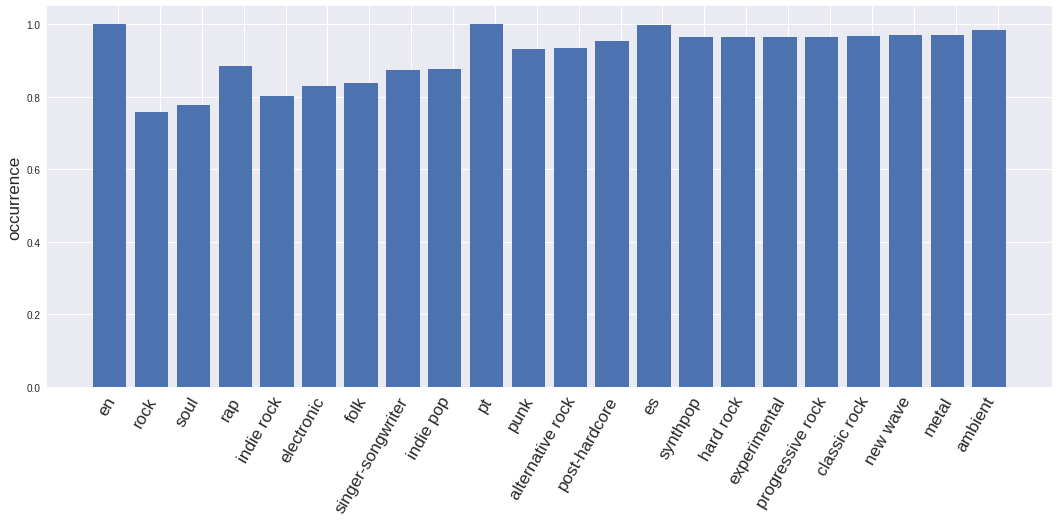

In [61]:
plot_confusion(precision_labels)

#### The lowest precision (= high false positive) is Rock, follower by soul.
Rock is the second highest genre after pop, and we remvoed pop this study, so this result is consistent with the week2's result of pop.

So the ground truth is en, pop, but prediction only returns en.

### Due to the RAM limit, I will continue the second approach, ClassifierChain in the different notebook.

### Approach2: Classifier Chains 
Classifier Chains preserves the correlation between genre and language. So in the large dataset, Classifier Chains possibly perform better than binary relation.

So MultinomialNB() is a base classifier, and ClassifierChain() is a problem transformer. 

In [56]:
# Create an Instance and fit()
clf = ClassifierChain(MultinomialNB())
clf.fit(X_train, y_train)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [57]:
# Predict
clf_predictions = clf.predict(X_test)

In [58]:
# Check For Accuracy by Jaccord similarlity
from sklearn.metrics import jaccard_score
#when we run classification on multi-label, use average=''samples''
jaccard_score(y_test, clf_predictions, average='samples')

0.5027223230490018

In [63]:
precision_labels_classifier_chain = multilabel_confusion_matirx(splitter2_all, y_test, clf_predictions)

precision: 1.0
precision: 0.7663932994129631
precision: 0.7771814404432132
precision: 0.8541822355076333
precision: 0.8038049940546969
precision: 0.8308769157545594
precision: 0.8375073286978634
precision: 0.8744456128273622
precision: 0.8778431642188266
precision: 1.0
precision: 0.9313475993162077
precision: 0.9348538460018246
precision: 0.95425595600805
precision: 0.9986407289776165
precision: 0.9649229169205635
precision: 0.9649229169205635
precision: 0.9649229169205635
precision: 0.9658145065398335
precision: 0.9693849822629043
precision: 0.9702786305051696
precision: 0.9720671621634975
precision: 0.985533644487337
Confusion matrix for label en:
[[ 154    0]
 [   0 2050]]
Confusion matrix for label rock:
[[1818   43]
 [ 323   20]]
Confusion matrix for label soul:
[[1943    0]
 [ 261    0]]
Confusion matrix for label rap:
[[1952   14]
 [ 224   14]]
Confusion matrix for label indie rock:
[[1976    0]
 [ 228    0]]
Confusion matrix for label electronic:
[[2009    0]
 [ 195    0]]
Conf

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

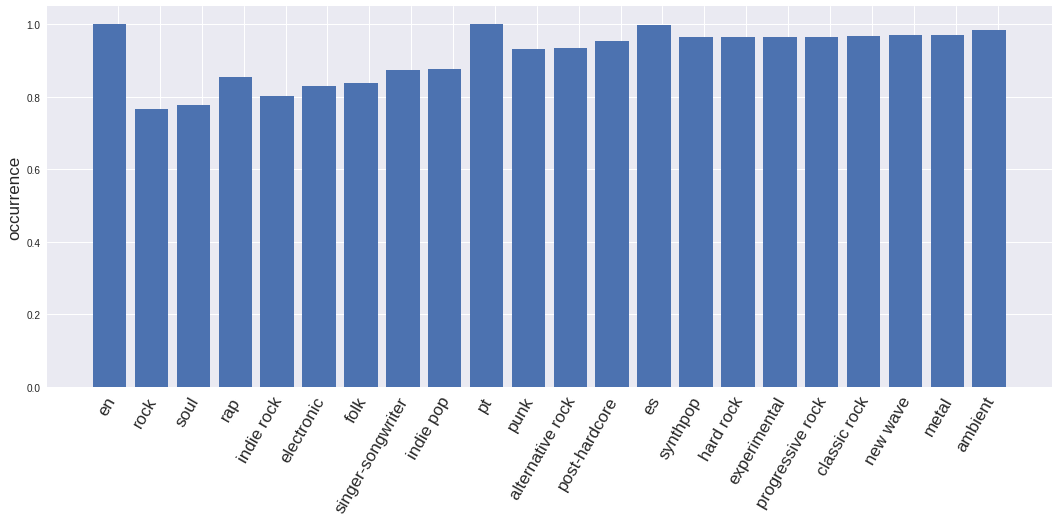

In [64]:
plot_confusion(precision_labels_classifier_chain)

Language detection is perfect.
But again, precision is low for rock, which means false positive for rock is high.